In [35]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA


In [36]:
# input image dimensions
img_rows, img_cols = 931, 601
immatrix = []
imlabel = []
listing = os.listdir("../dataset/OCT_ZEISS/vertical_cut") 
for file in listing:
    base = os.path.basename("../dataset/OCT_ZEISS/vertical_cut" + file)
    fileName = os.path.splitext(base)[0]
    #imlabel.append(trainLabels.loc[trainLabels.image==fileName, 'level'].values[0])
    im = Image.open("../dataset/OCT_ZEISS/vertical_cut/" + file)
    gray_im = im.convert('L')
    img = gray_im.resize((img_rows,img_cols))
    #img4d = np.expand_dims(img, axis=0)
    #img4d = preprocess_input(img4d)
    immatrix.append(np.array(img))
　　　　img_array=np.array(immatrix)
    

In [22]:
img_array.shape

(88, 601, 931)

In [23]:
img_array_2 = img_array.reshape((88,931*601))

In [24]:
# 主成分分析する
pca = PCA(n_components=2)
pca.fit(img_array_2)
# 分析結果を元にデータセットを主成分に変換する
transformed = pca.fit_transform(img_array_2)
    

In [25]:
from sklearn.cluster import KMeans

In [30]:
def t(n):
    km = KMeans(n_clusters=2,init='random',n_init=1,max_iter=n,random_state=1)
    cluster = km.fit_predict(transformed)
    %matplotlib inline
    plt.scatter(transformed[:,0],transformed[:,1],c=cluster)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    

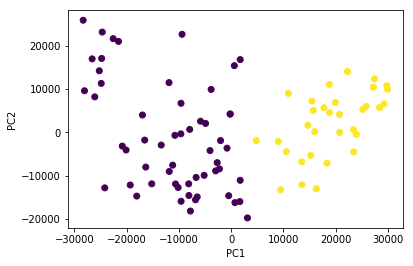

In [31]:
t(10)

In [34]:
def t(n):
    km = KMeans(n_clusters=2,init='random',n_init=1,max_iter=n,random_state=1)
    cluster = km.fit_predict(transformed)
    %matplotlib inline
    plt.scatter(transformed[:36,0],transformed[:36,1],c="red")
    plt.scatter(transformed[36:,0],transformed[36:,1],c="blue")
    plt.xlabel('PC1')
    plt.ylabel('PC2')


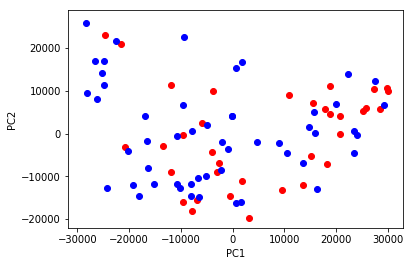

In [33]:
t(10)